# Thuto Wesley Sephai
# Umuzi Experience Gig XPL2
## Check-in Feedback Analysis - 11 November 2025
### Project Description

NLP Trend Identification

Conduct a thorough Natural Language Processing (NLP) analysis of the student check-in data. Primary goal is to transform the unstructured text in the "Win", "Loss", and "Blocker" columns into quantifiable, actionable insights. By identifying and quantifying the most frequent topics and sentiment trends uncover the core experiences of the student cohort. This analysis will directly inform program management about what is working well and where immediate improvements are needed.

### What are the expected outcomes?

1. Code Repository: A dedicated Git repository containing a self-contained Jupyter Notebook or Python script.
2. Top Trends Summary: A concise report, summarizing the:

- Top 5 most frequent Wins themes
- Top 5 most frequent Losses themes
- Top 5 most frequent Blockers themes

3. Visual Dashboard: Data visualisations that illustrate the frequency and distribution of the identified themes.

4. Recommendations: A concluding section that provides 3-5 concrete recommendations for the program team based on your findings.

### Load Data

In [35]:
# import libraries
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# load dataset
df = pd.read_csv('Copy of Umuzi XB1 Check in (Responses) - Form Responses 1 - Copy of Umuzi XB1 Check in (Responses) - Form Responses 1.csv')

In [43]:
# show first few rows
df.head()

,"Share a win from the last week (what went well, something you enjoyed)",Share a loss (something that was challenging or did not go well),"Share a blocker, if any (anything that stopped you from doing what you needed to do)"
0,Completing my first week with Umuzi gave me co...,I didn’t get opportunities from two companies ...,Being financially unstable has been draining m...
1,I enjoyed introspecting myself on the basis of...,Except for being sick and experiencing challen...,"None, only temporary set backs (reception and ..."
2,Submitting all my work in time and completing ...,I don’t have any,"Data , I couldn’t join some meetings because I..."
3,I submitted most of the assigned assignments,I did not understand some assignments s well a...,Spending most time in class leading to having ...
4,I enjoyed the Life Lifeline activity. I got to...,NaN,"I forgot to login to Google classroom, until I..."


### Data Cleaning
Ensures consistency before analysis

In [38]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [39]:
# missing values
df.isnull().sum()

Timestamp                                                                                 0
Column 2                                                                                372
Full name                                                                                 0
Please enter the date today                                                               0
Share a win from the last week (what went well, something you enjoyed)                   12
Share a loss (something that was challenging or did not go well)                         69
Share a blocker, if any (anything that stopped you from doing what you needed to do)     95
Anything else you would like to share or ask                                            154
dtype: int64

In [41]:
# focus on relevant columns
Win = "Share a win from the last week (what went well, something you enjoyed)"
Loss = "Share a loss (something that was challenging or did not go well)"
Blocker = "Share a blocker, if any (anything that stopped you from doing what you needed to do)"

# create a copy of relevant columns
df = df[[Win, Loss, Blocker]].copy()

# display the first few rows of a copy of the relevant columns
df.head()

,"Share a win from the last week (what went well, something you enjoyed)",Share a loss (something that was challenging or did not go well),"Share a blocker, if any (anything that stopped you from doing what you needed to do)"
0,Completing my first week with Umuzi gave me co...,I didn’t get opportunities from two companies ...,Being financially unstable has been draining m...
1,I enjoyed introspecting myself on the basis of...,Except for being sick and experiencing challen...,"None, only temporary set backs (reception and ..."
2,Submitting all my work in time and completing ...,I don’t have any,"Data , I couldn’t join some meetings because I..."
3,I submitted most of the assigned assignments,I did not understand some assignments s well a...,Spending most time in class leading to having ...
4,I enjoyed the Life Lifeline activity. I got to...,NaN,"I forgot to login to Google classroom, until I..."


In [8]:
# missing values
df.isnull().sum()

Share a win from the last week (what went well, something you enjoyed)                  12
Share a loss (something that was challenging or did not go well)                        69
Share a blocker, if any (anything that stopped you from doing what you needed to do)    95
dtype: int64

In [44]:
# remove special characters
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    return text

# standardizing case
df[Win] = df[Win].astype(str).apply(clean_text)
df[Loss] = df[Loss].astype(str).apply(clean_text)
df[Blocker] = df[Blocker].astype(str).apply(clean_text)

# handle missing values
df[Win] = df[Win].fillna("")
df[Loss] = df[Loss].fillna("")
df[Blocker] = df[Blocker].fillna("")


C:\Users\Geeks2_PC12\AppData\Local\Temp\ipykernel_24580\469677266.py:3: DeprecationWarning: 'count' is passed as positional argument
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
C:\Users\Geeks2_PC12\AppData\Local\Temp\ipykernel_24580\469677266.py:3: DeprecationWarning: 'count' is passed as positional argument
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
C:\Users\Geeks2_PC12\AppData\Local\Temp\ipykernel_24580\469677266.py:3: DeprecationWarning: 'count' is passed as positional argument
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)


In [45]:
# missing values
df.isnull().sum()

Share a win from the last week (what went well, something you enjoyed)                  0
Share a loss (something that was challenging or did not go well)                        0
Share a blocker, if any (anything that stopped you from doing what you needed to do)    0
dtype: int64

In [46]:
# combine all feedback copy into one column for analysis
df['All_Copy'] = df[Win].astype(str) + " " + df[Loss].astype(str) + " " + df[Blocker].astype(str)
df['All_Copy'].head()

0    completing my first week with umuzi gave me co...
1    i enjoyed introspecting myself on the basis of...
2    submitting all my work in time and completing ...
3    i submitted most of the assigned assignments i...
4    i enjoyed the life lifeline activity i got to ...
Name: All_Copy, dtype: object

### Tokenization & Stop Word Removal
### Lemmatization
Focuses the analysis on the keywords that convey meaning

In [47]:
# Ensure required NLTK resources are available (quiet downloads)
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)


True

In [48]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Clean and tokenize text robustly.
    - lowercase, remove non-letters, tokenise (prefer NLTK),
    - remove stopwords, lemmatize
    """
    if not isinstance(text, str):
        text = ''
    # lowercase
    text = text.lower()
    # remove non-letter characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # tokenization: prefer NLTK's word_tokenize if available; fall back to split
    try:
        tokens = word_tokenize(text)
    except Exception:
        tokens = text.split()
    # remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token and token not in stop_words]
    return cleaned_tokens


In [49]:

# Ensure combined column exists and apply preprocessing
if 'All_Copy' not in df.columns:
    df['All_Copy'] = df[Win].astype(str) + ' ' + df[Loss].astype(str) + ' ' + df[Blocker].astype(str)
df['Tokens'] = df['All_Copy'].apply(preprocess_text)
df['Tokens'].head()

0    [completing, first, week, umuzi, gave, confide...
1    [enjoyed, introspecting, basis, building, prot...
2    [submitting, work, time, completing, course, d...
3    [submitted, assigned, assignment, understand, ...
4    [enjoyed, life, lifeline, activity, got, dig, ...
Name: Tokens, dtype: object

### Sentiment Analysis
Group similar ideas together

In [50]:
# Classifying text as positive, negative, or neutral (row-level labels)
try:
    from textblob import TextBlob
except Exception as _e:
    print('TextBlob not available, attempting to install...', _e)
    import subprocess, sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'textblob'])
    from textblob import TextBlob

# sentiment label function with small thresholds to reduce neutral noise
def sentiment_label(text, pos_thresh=0.05, neg_thresh=-0.05):
    try:
        polarity = TextBlob(str(text)).sentiment.polarity
    except Exception:
        polarity = 0.0
    if polarity > pos_thresh:
        return 'positive'
    elif polarity < neg_thresh:
        return 'negative'
    else:
        return 'neutral'


In [51]:

# Apply labels per column (use cleaned text columns if available)
win_col = Win if 'Win' in globals() else 'Win'
loss_col = Loss if 'Loss' in globals() else 'Loss'
blocker_col = Blocker if 'Blocker' in globals() else 'Blocker'

df['Win_sentiment_label'] = df[win_col].astype(str).apply(sentiment_label)
df['Loss_sentiment_label'] = df[loss_col].astype(str).apply(sentiment_label)
df['Blocker_sentiment_label'] = df[blocker_col].astype(str).apply(sentiment_label)


In [52]:

# Summary counts and percentages
print('Win sentiment distribution:')
display(df['Win_sentiment_label'].value_counts())
display((df['Win_sentiment_label'].value_counts(normalize=True)*100).round(2))

print('\nLoss sentiment distribution:')
display(df['Loss_sentiment_label'].value_counts())
display((df['Loss_sentiment_label'].value_counts(normalize=True)*100).round(2))

print('\nBlocker sentiment distribution:')
display(df['Blocker_sentiment_label'].value_counts())
display((df['Blocker_sentiment_label'].value_counts(normalize=True)*100).round(2))


Win sentiment distribution:


Win_sentiment_label
positive    226
neutral     138
negative      8
Name: count, dtype: int64

Win_sentiment_label
positive    60.75
neutral     37.10
negative     2.15
Name: proportion, dtype: float64


Loss sentiment distribution:


Loss_sentiment_label
neutral     212
positive     97
negative     63
Name: count, dtype: int64

Loss_sentiment_label
neutral     56.99
positive    26.08
negative    16.94
Name: proportion, dtype: float64


Blocker sentiment distribution:


Blocker_sentiment_label
neutral     267
positive     53
negative     52
Name: count, dtype: int64

Blocker_sentiment_label
neutral     71.77
positive    14.25
negative    13.98
Name: proportion, dtype: float64

In [53]:

# Show sample negative examples for Wins (if any) to help interpret issues
neg_wins = df[df['Win_sentiment_label']=='negative'][win_col].dropna()
if not neg_wins.empty:
    print('\nSample negative Win responses (up to 5):')
    display(neg_wins.head(5))
else:
    print('\nNo negative Win responses found.')

# Save sentiment label columns to CSV (optional)
# df[['Win_sentiment_label','Loss_sentiment_label','Blocker_sentiment_label']].to_csv('sentiment_labels.csv', index=False)


Sample negative Win responses (up to 5):


29     managing to submit tasks even though it was a ...
101               getting a clear fundamentals behind ai
118    i managed to submit all my work without the us...
134    i have learned how to save money before i woul...
211    i managed to improve my marks after having a b...
Name: Share a win from the last week (what went well, something you enjoyed), dtype: object

### Topic Modeling
Quantify the overall mood of the "Wins" and "Losses" columns

We can extract topics using algorithms like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF).

In [54]:
# Simple runnable LDA example using scikit-learn
# This cell: vectorizes the combined text, fits LDA, prints top words per topic,
# and prints Top-5 frequent terms for each Win/Loss/Blocker column with counts.
try:
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation
except Exception:
    import subprocess, sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'scikit-learn'])
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation


In [55]:

# Prepare documents: use the combined column if available
if 'All_Copy' not in df.columns:
    df['All_Copy'] = df[Win].astype(str) + ' ' + df[Loss].astype(str) + ' ' + df[Blocker].astype(str)
documents = df['All_Copy'].fillna('').astype(str).tolist()

# Vectorize (simple count vectorizer). Use min_df=1 so small datasets still produce terms.
vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(documents)

# Fit LDA
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0, learning_method='batch')
lda.fit(dtm)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [56]:

# Helper to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        print('Topic %d: %s' % (topic_idx + 1, ' '.join(top_features)))

print(f'Fitted LDA with {n_topics} topics. Top words per topic (All responses):')
display_topics(lda, vectorizer.get_feature_names_out(), 10)


Fitted LDA with 5 topics. Top words per topic (All responses):
Topic 1: nan time week able tasks submit electricity im course data
Topic 2: week nan really enjoyed managed got project time work life
Topic 3: time work tasks managed complete stay week completed able plan
Topic 4: enjoyed doing really plan odyssey test time went week sessions
Topic 5: week time learning able nan course enjoyed ai data financial


In [57]:

# Additionally: compute Top-5 most frequent terms separately for each column (with counts)
from sklearn.feature_extraction.text import CountVectorizer as CV

def top_n_terms_for_column(column, n=5):
    docs = df[column].fillna('').astype(str).tolist()
    if not any(doc.strip() for doc in docs):
        return []
    vec = CV(max_df=0.95, min_df=1, stop_words='english')
    X = vec.fit_transform(docs)
    term_sums = X.sum(axis=0).A1
    if term_sums.size == 0:
        return []
    top_idx = term_sums.argsort()[::-1][:n]
    terms = vec.get_feature_names_out()
    return [(terms[i], int(term_sums[i])) for i in top_idx]

for col_name, display_name in [(Win, 'Wins'), (Loss, 'Losses'), (Blocker, 'Blockers')]:
    top = top_n_terms_for_column(col_name, 5)
    print(f'\nTop 5 most frequent {display_name} themes:')
    if top:
        for term, count in top:
            print(f'{term}: {count}')
    else:
        print('No terms found.')


Top 5 most frequent Wins themes:
enjoyed: 90
week: 45
learning: 40
time: 38
really: 38

Top 5 most frequent Losses themes:
nan: 69
time: 60
week: 35
work: 34
able: 22

Top 5 most frequent Blockers themes:
nan: 95
time: 52
blocker: 38
work: 27
week: 27


Visual Dashboard: Data visualisations (e.g., bar charts, word clouds) that illustrate the frequency and distribution of the identified themes.


Top 5 Wins


,themes,count
0,enjoyed,90
1,week,45
2,learning,40
3,time,38
4,really,38


C:\Users\Geeks2_PC12\AppData\Local\Temp\ipykernel_24580\1295280496.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='themes', data=df_top, palette='viridis')


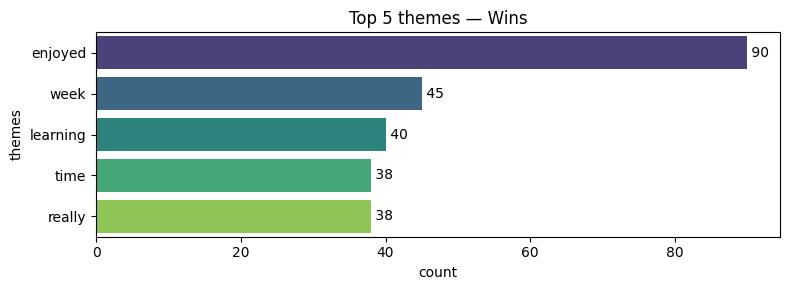

WordCloud not available; skipped word cloud for Top 5 themes — Wins

Top 5 Losses


,themes,count
0,nan,69
1,time,60
2,week,35
3,work,34
4,able,22


C:\Users\Geeks2_PC12\AppData\Local\Temp\ipykernel_24580\1295280496.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='themes', data=df_top, palette='viridis')


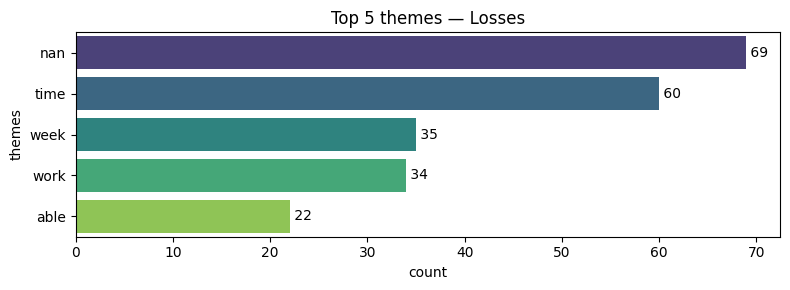

WordCloud not available; skipped word cloud for Top 5 themes — Losses

Top 5 Blockers


,themes,count
0,nan,95
1,time,52
2,blocker,38
3,work,27
4,week,27


C:\Users\Geeks2_PC12\AppData\Local\Temp\ipykernel_24580\1295280496.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='themes', data=df_top, palette='viridis')


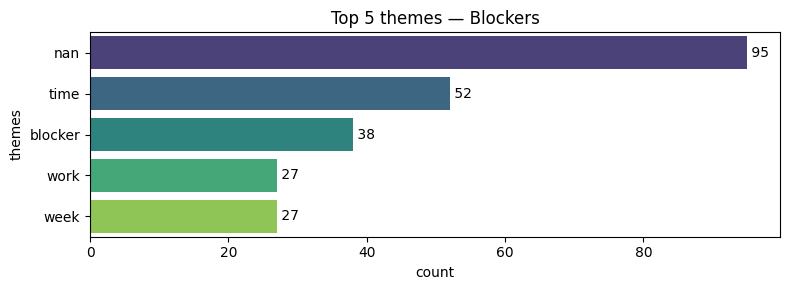

WordCloud not available; skipped word cloud for Top 5 themes — Blockers


In [58]:
# Guarded imports
try:
    from sklearn.feature_extraction.text import CountVectorizer as CV 
except Exception:
    CV = None

try:
    from wordcloud import WordCloud
except Exception:
    WordCloud = None

def top_terms_df(column, n=15):
    if 'df' not in globals():
        raise RuntimeError('DataFrame `df` not found - run preprocessing cells first')
    docs = df[column].fillna('').astype(str).tolist()
    if not any(doc.strip() for doc in docs):
        return pd.DataFrame(columns=['themes','count'])
    if CV is None:
        # try local import if sklearn was missing earlier
        from sklearn.feature_extraction.text import CountVectorizer as CV_local
        vec = CV_local(max_df=0.95, min_df=1, stop_words='english')
    else:
        vec = CV(max_df=0.95, min_df=1, stop_words='english')
    X = vec.fit_transform(docs)
    sums = X.sum(axis=0).A1
    terms = vec.get_feature_names_out()
    idx = sums.argsort()[::-1][:n]
    return pd.DataFrame({'themes': terms[idx], 'count': sums[idx].astype(int)})

def plot_term_bar(df_top, title):
    if df_top.empty:
        print(f'No themes for {title}')
        return
    plt.figure(figsize=(8, max(3, len(df_top)*0.35)))
    sns.barplot(x='count', y='themes', data=df_top, palette='viridis')
    plt.title(title)
    for i, (cnt, themes) in enumerate(zip(df_top['count'], df_top['themes'])):
        plt.text(cnt, i, f' {int(cnt)}', va='center')
    plt.tight_layout()
    plt.show()

    # WordCloud (optional)
    if WordCloud is not None:
        freqs = dict(zip(df_top['themes'], df_top['count']))
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freqs)
        plt.figure(figsize=(10,4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(title + ' — WordCloud')
        plt.show()
    else:
        print('WordCloud not available; skipped word cloud for', title)

# Display & plot Top-5 for each column
for col, label in [(Win, 'Wins'), (Loss, 'Losses'), (Blocker, 'Blockers')]:
    print(f'\nTop 5 {label}')
    df_top = top_terms_df(col, n=5)
    display(df_top)
    plot_term_bar(df_top, f'Top 5 themes — {label}')